# Assignment 1

## 1.

### a)

#### Importing ourworldindata csv file

In [2]:
import pandas as pd

df = pd.read_csv('datasets\life-expectancy-vs-gdp-per-capita.csv')

#### Cleaning and selecting data
We chose the year 2012 simply becasue we found it to not have a lot of missing data for GDP and life expectancy.

In [3]:
# Only selecting the rows where year is 2012
gdp2012 = df[df['Year'] == 2012]

# Creating dataframe with the relevant columns
gdp2012 = pd.DataFrame(gdp2012, columns=['Entity', 'Year', 'Real GDP per capita in 2011US$, multiple benchmarks (Maddison Project Database (2018))', 'Life expectancy', 'Total population (Gapminder, HYDE & UN)'])

# Cleaning the data, removing NaN-values
gdp2012.dropna(subset=['Real GDP per capita in 2011US$, multiple benchmarks (Maddison Project Database (2018))'], inplace=True)
gdp2012.dropna(subset=['Life expectancy'], inplace=True)

# Removing non-countries
gdp2012 = gdp2012[gdp2012['Entity'] != 'World']
gdp2012 = gdp2012[gdp2012['Entity'] != 'Africa']

gdp2012


,Entity,Year,"Real GDP per capita in 2011US$, multiple benchmarks (Maddison Project Database (2018))",Life expectancy,"Total population (Gapminder, HYDE & UN)"
213,Afghanistan,2012,1945.0,62.054,31161000.0
557,Albania,2012,10344.0,77.252,2914000.0
777,Algeria,2012,13242.0,75.436,37384000.0
1363,Angola,2012,8074.0,57.236,25108000.0
1874,Argentina,2012,19841.0,75.598,41755000.0
...,...,...,...,...,...
48669,Venezuela,2012,17752.0,73.037,29361000.0
48889,Vietnam,2012,4911.0,74.958,89802000.0
49767,Yemen,2012,3707.0,65.920,24473000.0
49990,Zambia,2012,3413.0,58.502,14465000.0


#### Plotting the data
We added a simple regression line with the help of numpy in order to make the correlation clearer.

The x and y limits were changed to make the graph clearer since one outlier (Qatar) made the graph hard to interpret.

Text(0, 0.5, 'Life expectancy')

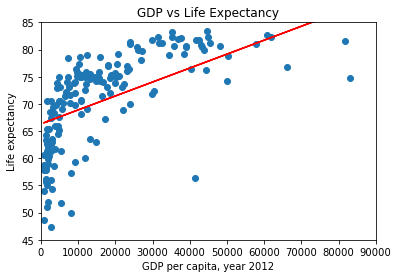

In [4]:
import matplotlib.pyplot as plt
import numpy as np

x = gdp2012['Real GDP per capita in 2011US$, multiple benchmarks (Maddison Project Database (2018))']
y = gdp2012['Life expectancy']

# Creating scatterplot with custom x and y limits
plt.scatter(x, y)
plt.xlim(0, 90000) # Includes every country except for Qatar
plt.ylim(45, 85)

# Adding regression line
k, m = np.polyfit(x, y, 1)
plt.plot(x, k*x + m, color='red')

# Adding title and labels
plt.title('GDP vs Life Expectancy')
plt.xlabel('GDP per capita, year 2012')
plt.ylabel('Life expectancy')

### b)
There seems to be a correlation between GDP per capita and life expectancy, which seems reasonable since richer countries tends to have better access to e.g. healthcare.

### c)
We removed all rows with missing data for either GDP or life expectancy since they were not useful. The rows for World and Africa were also removed since we only include countries in this and do not want these values to mess with e.g. the mean and standard deviation. When plotting the data, we also changed the x-limit in order to exclude Qatar since their extremely high GDP per capita made the graph hard to interpret.

### d)


In [5]:
# Calculating the standard deviation and mean of the life expectancy
sd = np.std(gdp2012['Life expectancy'])
mean = np.mean(gdp2012['Life expectancy'])

# Selecting all the rows where the life expectancy is higher than one standard deviation above the mean
countries_above_one_sd = gdp2012[gdp2012['Life expectancy'] > (mean + sd)]

countries_above_one_sd

,Entity,Year,"Real GDP per capita in 2011US$, multiple benchmarks (Maddison Project Database (2018))",Life expectancy,"Total population (Gapminder, HYDE & UN)"
2507,Australia,2012,44871.0,82.291,22904000.0
2727,Austria,2012,43052.0,80.906,8502000.0
4277,Belgium,2012,38907.0,80.444,11085000.0
7569,Canada,2012,41615.0,81.674,34922000.0
10717,Cyprus,2012,27174.0,79.812,1135000.0
11472,Denmark,2012,43697.0,79.958,5611000.0
14757,Finland,2012,38865.0,80.586,5415000.0
15710,France,2012,36773.0,81.852,63564000.0
16736,Germany,2012,43198.0,80.391,80973000.0
17247,Greece,2012,23898.0,80.963,10781000.0


### e)


In [6]:
# Calculating the standard deviation of life expectancy
sd_life = np.std(gdp2012['Life expectancy'])

# Calculating the mean of GDP and life expectancy
mean_life = np.mean(gdp2012['Life expectancy'])
mean_gdp = np.mean(gdp2012['Real GDP per capita in 2011US$, multiple benchmarks (Maddison Project Database (2018))'])

# We count all values above this value as having a high life expectancy
high_life = mean_life + (sd_life / 2)

# Selecting the rows where life expectancy is above high_life and GDP is below the mean
results = gdp2012[gdp2012['Life expectancy'] > high_life]
results = results[results['Real GDP per capita in 2011US$, multiple benchmarks (Maddison Project Database (2018))'] < mean_gdp]

results

,Entity,Year,"Real GDP per capita in 2011US$, multiple benchmarks (Maddison Project Database (2018))",Life expectancy,"Total population (Gapminder, HYDE & UN)"
557,Albania,2012,10344.0,77.252,2914000.0
777,Algeria,2012,13242.0,75.436,37384000.0
3829,Barbados,2012,10475.0,78.547,284000.0
5517,Bosnia and Herzegovina,2012,9388.0,76.401,3605000.0
9033,Colombia,2012,12078.0,75.882,46076000.0
9763,Costa Rica,2012,12397.0,79.074,4688000.0
10427,Cuba,2012,7138.0,78.446,11257000.0
12496,Ecuador,2012,10342.0,75.495,15474000.0
23960,Lebanon,2012,15903.0,78.611,5538000.0
28999,Montenegro,2012,15709.0,75.823,626000.0


### f)

In [7]:
# Add column for total GDP to gdp2012 dataframe
total_gdp = gdp2012['Real GDP per capita in 2011US$, multiple benchmarks (Maddison Project Database (2018))'] * gdp2012['Total population (Gapminder, HYDE & UN)']
gdp2012['Total GDP'] = total_gdp

# Calculating the mean of total GDP and life expectancy
mean_life = np.mean(gdp2012['Life expectancy'])
mean_total_gdp = np.mean(gdp2012['Total GDP'])

# Selecting the rows where total gdp is higher than the mean and life expectancy is below the mean
results = gdp2012[gdp2012['Total GDP'] > mean_total_gdp]
results = results[results['Life expectancy'] < mean_life]

results

,Entity,Year,"Real GDP per capita in 2011US$, multiple benchmarks (Maddison Project Database (2018))",Life expectancy,"Total population (Gapminder, HYDE & UN)",Total GDP
12724,Egypt,2012,10736.0,70.736,8.642200e+07,9.278266e+11
19886,India,2012,4974.0,67.545,1.265780e+09,6.295990e+12
20106,Indonesia,2012,9144.0,69.866,2.484520e+08,2.271845e+12
31561,Nigeria,2012,5370.0,51.786,1.672290e+08,8.980197e+11
33118,Pakistan,2012,4568.0,65.849,1.872800e+08,8.554950e+11
36564,Russia,2012,23827.0,69.944,1.439940e+08,3.430945e+12
40973,South Africa,2012,11880.0,60.060,5.283300e+07,6.276560e+11


These countries listed in the table above all have high GDP (can be indicated as a strong economy) and low life expectancy. This means that not every strong economy (or at least high GDP) have high life expectancy. This might be due to their high total population or money not being fairly distributed.

### g)

In [8]:
# Calculating the mean of total GDP and life expectancy
mean_life = np.mean(gdp2012['Life expectancy'])
mean_gdp = np.mean(gdp2012['Real GDP per capita in 2011US$, multiple benchmarks (Maddison Project Database (2018))'])

# Selecting the rows where gdp per capita is higher than the mean and life expectancy is below the mean
results = gdp2012[gdp2012['Real GDP per capita in 2011US$, multiple benchmarks (Maddison Project Database (2018))'] > mean_gdp]
results = results[results['Life expectancy'] < mean_life]

results

,Entity,Year,"Real GDP per capita in 2011US$, multiple benchmarks (Maddison Project Database (2018))",Life expectancy,"Total population (Gapminder, HYDE & UN)",Total GDP
13164,Equatorial Guinea,2012,41292.0,56.288,1031000.0,4.257205e+10
22182,Kazakhstan,2012,21947.0,68.805,16752000.0,3.676561e+11
36564,Russia,2012,23827.0,69.944,143994000.0,3.430945e+12


Now we only get three results, with only Russia being in both. Since the population size does not matter here, these countries low life expectancy might be explained by money not being fairly distributed and general bad healthcare for the majority of citizens. There only being three countries in this list indicates that there are very few countries that have high GDP per capita and low life expectancy. With other words, being a rich country does in almost all cases mean that your citizens will live long.